<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Hatim Sawai</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300108</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 8</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../docs/pledge.jpg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      <strong>Regression Analysis on Real-time data:</strong>
      <br>
      1. Pick up 3 stocks from the S&P500 index (or any other index of interest) and fetch their data from 2010-01-01 to present date into a pandas dataframe
      <br>
      2. Train a regression model using OLS in statsmodels library on 80% of the historic data for each stock, and predict on the recent 20%
      <br>
      3. Print the model summary and explain what do each of the components in the report summary mean
      <br>
      4. Evaluate the fitted model on various statistical metrics for error on 'train' and 'test'
      <br>
      5. Assess the model on metrics that calculate goodness of fit on 'train' and 'test'
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">THEORY</td>
    <td class="tg-0pky col2">
      <strong>1.Fetching Stock data:</strong>
      <br>
      Stock data is essential for conducting regression analysis in finance. It typically includes attributes such as Open, High, Low, Close prices, and trading volume. Fetching historical stock data allows us to analyze price movements over time and build predictive models.
      <br>
      In this task, we select three stocks from a stock index (e.g., S&P 500) and retrieve their historical data using a financial data provider like Yahoo Finance. We store the data in a pandas DataFrame for further analysis.
      <br>
      <br>
      <strong>2. Training a regression model using OLS:</strong>
      <br>
      Ordinary Least Squares (OLS) regression is a statistical method used to estimate the relationship between one or more independent variables (features) and a dependent variable (target). It minimizes the sum of squared differences between observed and predicted values.
      <br>
      We split the historical data into training and testing sets. Then, we train an OLS regression model using the training data, where the independent variables are features like Open, High, Low prices, and trading volume, and the dependent variable is the Close price.
      <br>
      <br>
      <strong>3. Model Summarization:</strong>
      <br>
      The model summary provides detailed information about the regression model's coefficients, statistical significance, goodness of fit, and other relevant statistics. It helps interpret the model's effectiveness and identify potential issues.
      <br>
      We print the summary of the trained regression model using the <code>summary()</code> method provided by the statsmodels library. The summary includes information such as coefficient estimates, standard errors, t-statistics, p-values, and goodness-of-fit measures like R-squared.
      <br>
      <br>
      <strong>4. Evaluating model on statistical metrics:</strong>
      <br>
      Evaluating the model involves assessing its performance using statistical metrics to measure the accuracy and reliability of predictions. Common metrics include Root Mean Squared Error (RMSE) and R-squared (R2).
      <br>
      We calculate RMSE and R2 scores for both the training and testing sets. RMSE measures the average deviation of predicted values from actual values, while R2 measures the proportion of variance in the target variable explained by the independent variables. Lower RMSE and higher R2 values indicate better model performance.
      <br>
      <br>
      <strong>5. Goodness of fit metrics:</strong>
      <br>
      Goodness of fit metrics assess how well the regression model fits the observed data. They quantify the model's ability to capture patterns and variability in the data.
      <br>
      We interpret the RMSE and R2 scores calculated in the previous step as goodness-of-fit metrics. RMSE quantifies the model's prediction error, while R2 indicates the proportion of variance explained by the model. Higher R2 and lower RMSE values suggest a better fit between the model and the data.
      <br>
      <br>
    </td>
  </tr>
</tbody>
</table> 

<div style="page-break-before: always;"></div>

### 1. Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 2. Fetching Data

In [3]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

### 3. Training Regression Model using OLS

In [4]:
def train_and_predict_regression(data):
    X = data[["Open", "High", "Low", "Volume"]]
    y = data["Close"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()

    X_test = sm.add_constant(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return model, y_pred_train, y_pred_test, y_train, y_test

### 4. Model Evaluation

In [5]:
def evaluate_model(y_train, y_test, y_pred_train, y_pred_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")

    return train_rmse, test_rmse, train_r2, test_r2

### Plots & Visualizations

In [6]:
def plot_results(ticker, y_train, y_test, y_pred_train, y_pred_test):
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label="Train")
    plt.plot(y_test.index, y_test, label="Test")
    plt.plot(y_train.index, y_pred_train, label="Train Prediction")
    plt.plot(y_test.index, y_pred_test, label="Test Prediction")
    plt.title(f"{ticker} Stock Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    # Plot the residuals
    residuals_train = y_train - y_pred_train
    residuals_test = y_test - y_pred_test
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, residuals_train, label="Train Residuals")
    plt.plot(y_test.index, residuals_test, label="Test Residuals")
    plt.title(f"{ticker} Stock Price Prediction Residuals")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

### 3. Output

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed




*** TSLA ***
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.701e+06
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:57   Log-Likelihood:                -3479.1
No. Observations:                2765   AIC:                             6968.
Df Residuals:                    2760   BIC:                             6998.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.026     

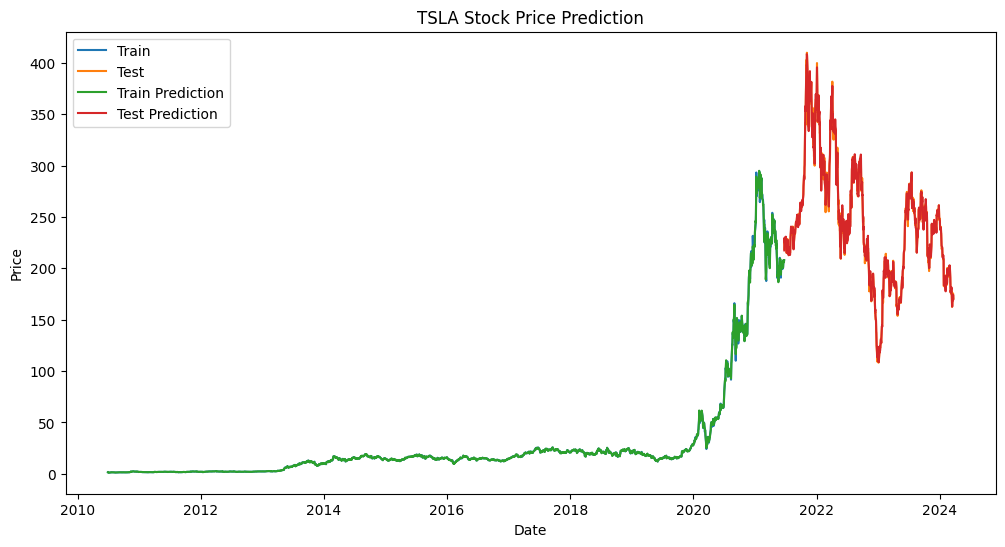

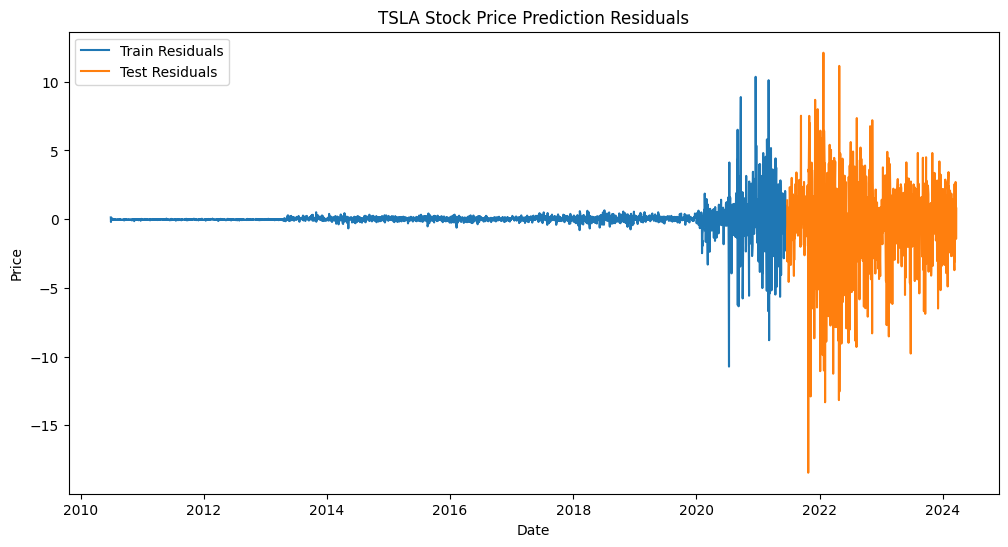



*** NFLX ***
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.061e+06
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:58   Log-Likelihood:                -6211.8
No. Observations:                2863   AIC:                         1.243e+04
Df Residuals:                    2858   BIC:                         1.246e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0233      0.084     

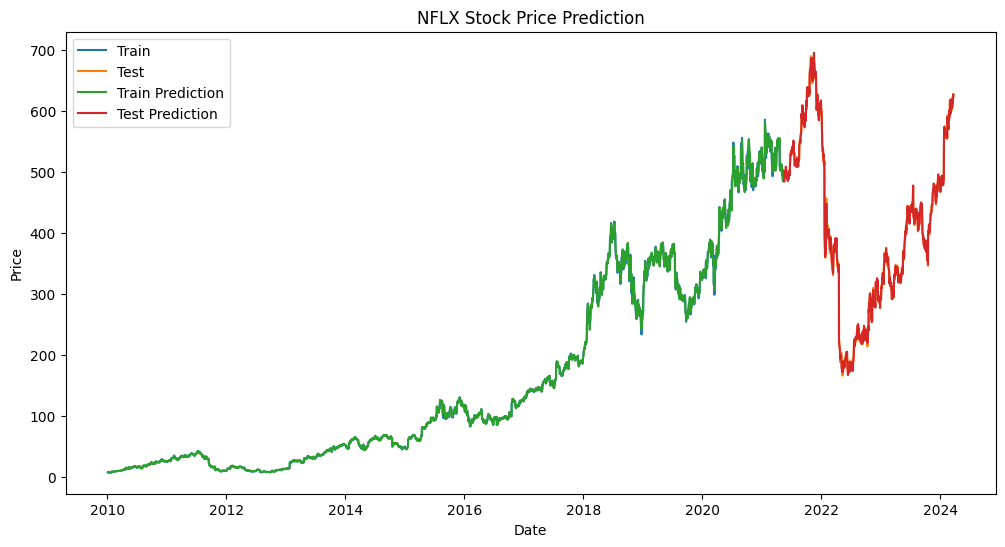

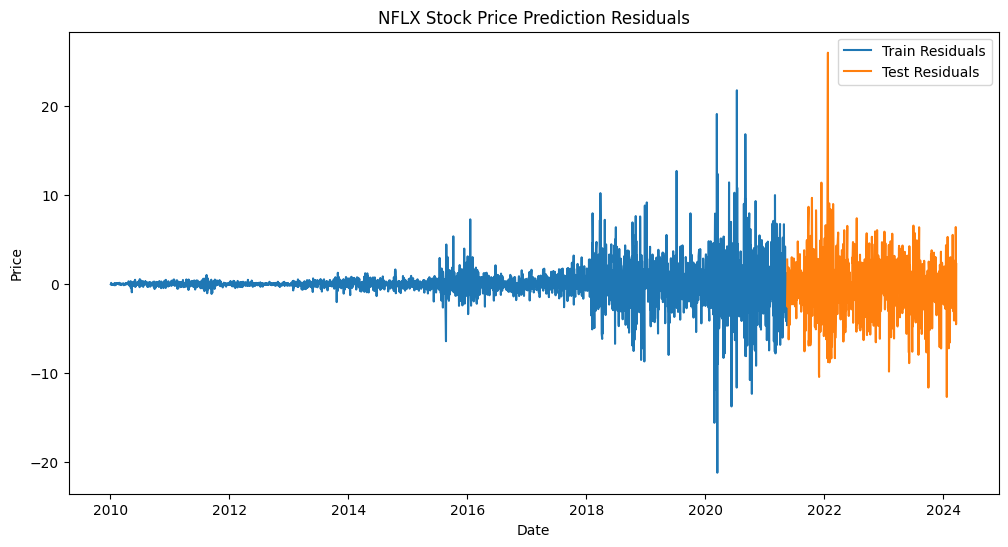



*** GOOG ***
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.552e+06
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:59   Log-Likelihood:                -228.70
No. Observations:                2863   AIC:                             467.4
Df Residuals:                    2858   BIC:                             497.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0297      0.016     

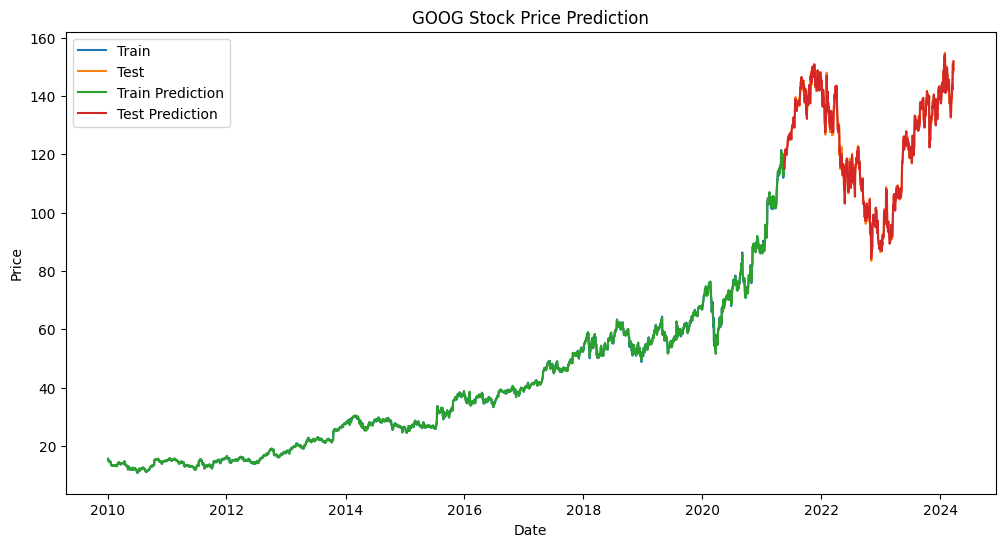

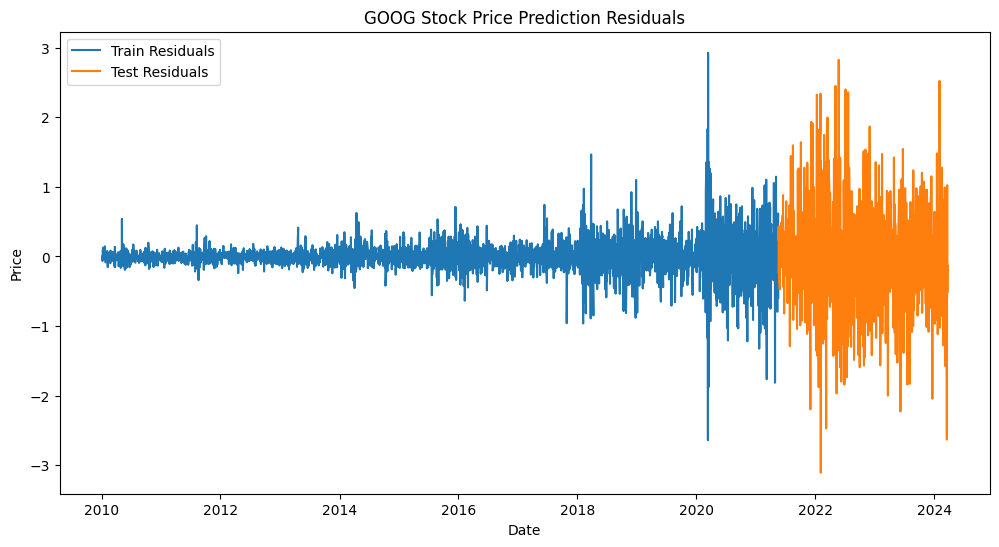

In [7]:
start_date = "2010-01-01"
end_date = "2024-03-25"
tickers = ["TSLA", "NFLX", "GOOG"]

stock_data = {}
for ticker in tickers:
    stock_data[ticker] = fetch_stock_data(ticker, start_date, end_date)

# Train regression model, print summary, evaluate, and plot results
for ticker, data in stock_data.items():
    model, y_pred_train, y_pred_test, y_train, y_test = train_and_predict_regression(
        data
    )
    print(f"\n\n*** {ticker} ***")
    print(model.summary())
    # print model accuracy
    print("Model Accuracy:")
    print(model.rsquared)
    train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(
        y_train, y_test, y_pred_train, y_pred_test
    )
    plot_results(ticker, y_train, y_test, y_pred_train, y_pred_test)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">In this experiment we learned how to perform regression analysis on real-time stock data. We fetched historical stock data for three stocks, trained regression models using OLS, and evaluated the models on statistical metrics. The model summaries provided insights into the relationships between stock prices and other attributes. We also assessed the models' goodness of fit using RMSE and R2 scores. Overall, this experiment demonstrated the application of regression analysis in finance and the importance of model evaluation for predictive accuracy.
    </td>
  </tr>
</tbody>
</table> 